In [1]:
import sys
sys.path.append("/end/home/rh2310/TINN/turing_codebase")
#from solvers.explicit_Euler import integrate
from solvers.gpu import integrate
#from solvers.explicit_Adams_Bashforth import integrate
#from solvers.turing_models import Brusselator
from solvers.turing_models_gpu import Brusselator_GPU

In [11]:
from matplotlib import pyplot as plt

In [41]:
n = (128, 128)
L = (2, 2)


D_u = .002
D_v = .04
Ds = np.array([D_u, D_v])
A = 2
B = 3

c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :, :] += A
c0[1, :, :] += B/A

f_args = (A, B)
t = np.linspace(0, 128*5, 128*5)
dt = 0.001

In [42]:
sol = integrate(c0, t, dt, n, L, Ds, Brusselator_GPU, f_args, 1)

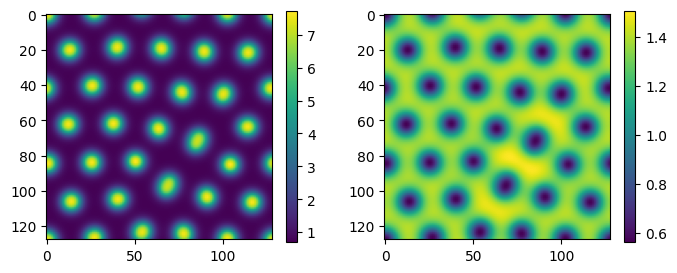

In [43]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow( sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [44]:
diff_2 = (sol[..., :-1]-sol[..., 1:])
max_diff = np.max(diff_2, axis=(0,1,2))

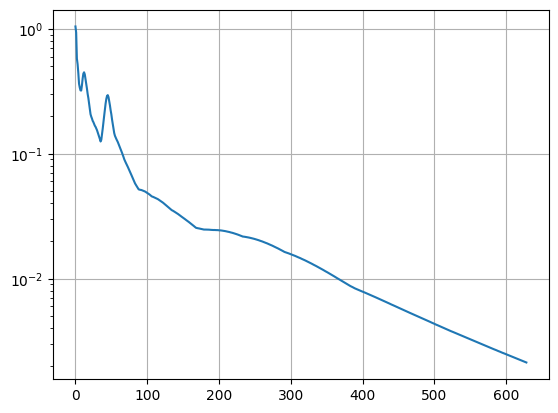

In [45]:
plt.plot(max_diff[10:])
plt.yscale('log')
plt.grid()
plt.show()

In [46]:
sol2 = integrate(c0, t, dt, n, L, Ds, Brusselator_GPU, f_args, 2)

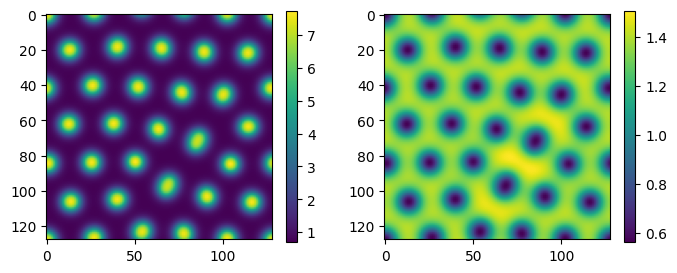

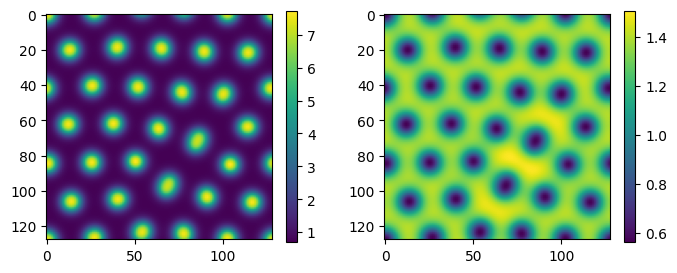

In [47]:
index = 500
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow( sol2[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow( sol2[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [52]:
diff_22 = (sol2[..., :-1]-sol2[..., 1:])
max_diff2 = np.max(diff_22, axis=(0,1,2))

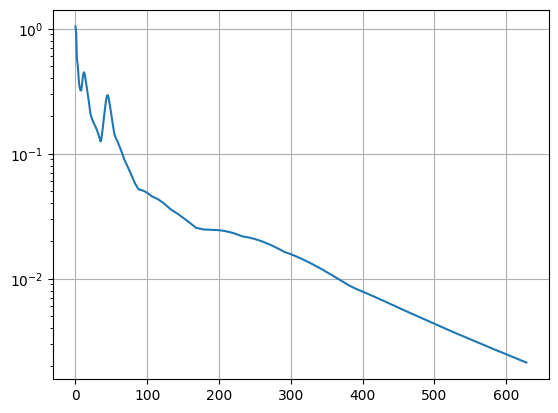

In [53]:
plt.plot(max_diff2[10:])
plt.yscale('log')
plt.grid()
plt.show()

(64, 64, 2, 2)
(64, 64, 2, 2)


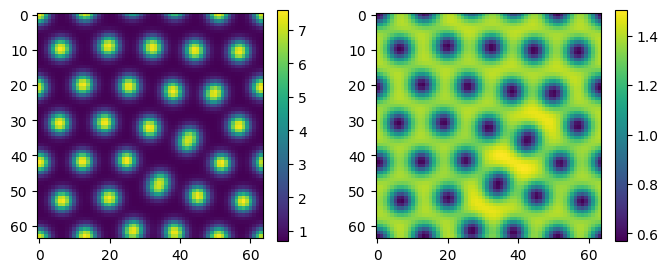

In [51]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(pool2D(sol[0,:,:, index], (2,2), (2,2)))
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(pool2D(sol[1,:,:, index], (2,2), (2,2)))
plt.colorbar(shrink=.75)
plt.show()

In [87]:
pool2D(sol[0,:,:, index], (2,2), (2,2)).shape

(64, 64, 2, 2)


(64, 64)

In [50]:
from numpy.lib.stride_tricks import sliding_window_view

def pool2D(arr, window, stride=(1,1), op=np.average):
    ret = sliding_window_view(arr,window)[::stride[0],::stride[1]]
    print(ret.shape)
    l = len(ret.shape)
    return op(ret, axis=tuple(range(l-2, l)))

In [97]:
t[2500]

2500.4883766360617

In [60]:
with open('/end/home/rh2310/test/outputs/Brusselator_2_1/Brusselator_2_1.npy', 'rb') as f:
    nsol3 = np.load(f)

In [61]:
diff_23 = (nsol3[..., :-1]-nsol3[..., 1:])
max_diff3 = np.max(diff_22, axis=(0,1,2))

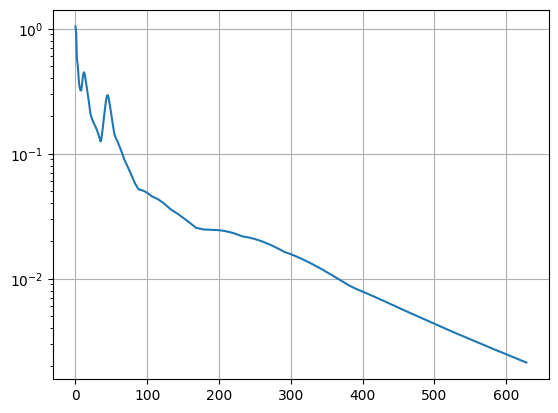

In [62]:
plt.plot(max_diff3[10:])
plt.yscale('log')
plt.grid()
plt.show()

In [63]:
nsol3.shape

(2, 128, 128, 1024)

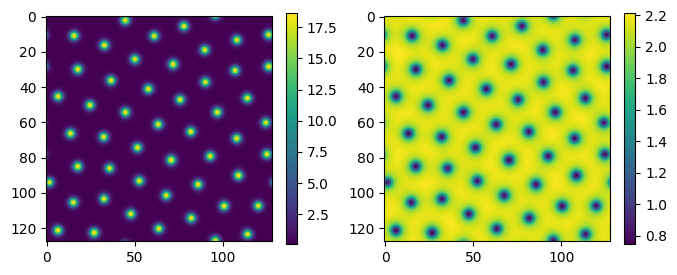

(64, 64, 2, 2)
(64, 64, 2, 2)


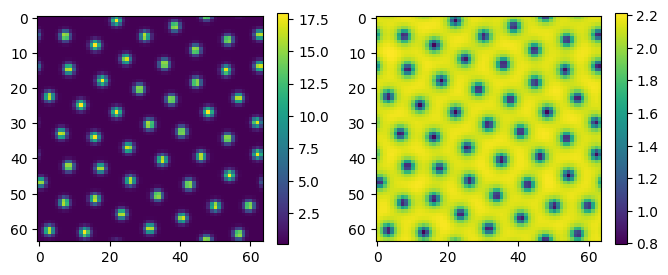

In [67]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(nsol3[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(nsol3[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(pool2D(nsol3[0,:,:, index], (2,2), (2,2)))
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(pool2D(nsol3[1,:,:, index], (2,2), (2,2)))
plt.colorbar(shrink=.75)
plt.show()

In [68]:
parameters={"kappa_u":0.0, "mu_u":1.0, "rho_u":0.1, "rho_v":0.025, "sigma_u":1.0, "sigma_v":1.0}

In [69]:
f_args = tuple(parameters.values())

In [70]:
f_args

(0.0, 1.0, 0.1, 0.025, 1.0, 1.0)

In [71]:
sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u = f_args

In [72]:
sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u

(0.0, 1.0, 0.1, 0.025, 1.0, 1.0)